## Special Instructions to run my code:
#### 1. 1243912_time.csv needs to be in the same folder as this current file. 
#### 2. 1243912_spatial.csv needs to be in the same folder as this current file.
#### 3. variogram_model.py needs to be in the same folder as this current file.
#### 4. kriging.py needs to be in the same folder as this current file.

# 1 Time-Series Analysis of Energy Consumption in the Netherlands

Thalia Rademakers 

Snr. 1243912 

Anr. 119079

*This section is worth a total of 50 points. You are provided with a dataset (XXXXXXXtime.csv), which contains the month and energy consumption in kilowatts in the Netherlands. The time-series were modified from the Monthly Energy Consumption Data Set from CBS Netherlands. You will create code to explore and visualize the dataset, detect periodicity and perform forecasting.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy import signal
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
import warnings
from statsmodels.tsa.arima_model import ARIMA
import scipy.stats as stats
from matplotlib import style
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings("ignore")

### 1. (3 points) Load the dataset. Find the earliest date and the most recent date of your dataset. 

In [3]:
energy = pd.read_csv('1243912_time.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
display(energy.head())
display(energy.dtypes)

1986-01-01    5774
1986-02-01    5246
1986-03-01    5422
1986-04-01    5272
1986-05-01    5008
Name: Consumption, dtype: int64

dtype('int64')

In [4]:
# Find the earliest date and the most recent date of your dataset.
print(energy.head(1))
print(energy.tail(1))

1986-01-01    5774
Name: Consumption, dtype: int64
2020-02-01    9747
Name: Consumption, dtype: int64


---
*Find the earliest date and the most recent date of your dataset.*

The earliest date is 01-01-1986. The most recent date is 01-02-2020.

---

### 2. (2 points) Check for missing data. If there is missing data, perform an appropriate missing data imputation. 

In [5]:
print(energy.isnull().sum())

0


---
*Check for missing data.*

There is no missing data

---

In [6]:
# Use Seaborn style for all coming plots 
style.use('seaborn')

### 3. (5 points) Compute the temporal auto correlation. From the plot, motivate why the periodicity is 12 months.

<Figure size 576x432 with 0 Axes>

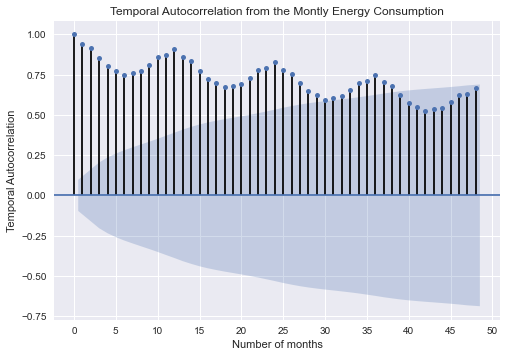

In [7]:
# Compute the temporal auto correlation 
plt.figure(figsize=(8,6))
plot_acf(energy, lags=48)
plt.title("Temporal Autocorrelation from the Montly Energy Consumption")
plt.xlabel("Number of months")
plt.ylabel("Temporal Autocorrelation")
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.show()

---
*Motivate why the periodicity is 12 months.*

You can see a yearly pattern, exactly every 12 months. In January there is a high consumption, in the summer there is a decrease in energy consumption and in the last months of the year, the energy consumption increases again.

---

### 4. (5 points) Display the periodicity of the dataset with a periodogram. 

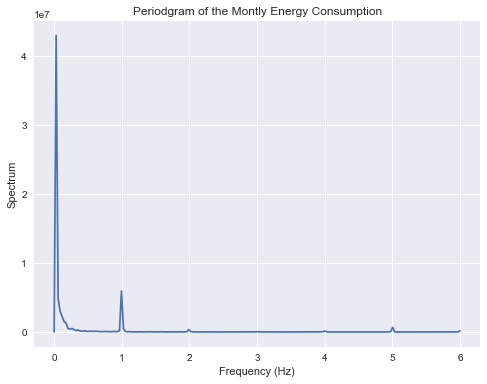

In [8]:
# Find the periodogram 
f, Pxx_den = signal.periodogram(energy, 12)

# Plot f vs Pxx_den
plt.figure(figsize=(8,6))
plt.plot(f, Pxx_den)
plt.title("Periodgram of the Montly Energy Consumption")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.show()

### 5. (10 points) Separate the trend, seasonal and residual noise components. Display each component separately. Display the residual noise as a scatter plot and QQ plot. From your interpretation of the residual plots, are there cyclic, trend or seasonal effects which are unaccounted for?

<Figure size 576x396 with 0 Axes>

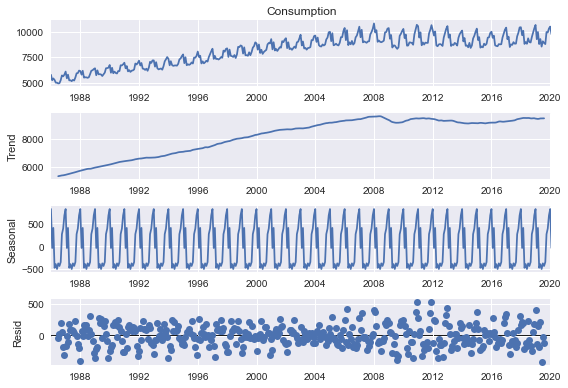

In [9]:
# Separate the trend, seassonal and residual noise components
result_energy = seasonal_decompose(energy, model='additive', period=12)

plt.figure()
result_energy.plot()
plt.show()

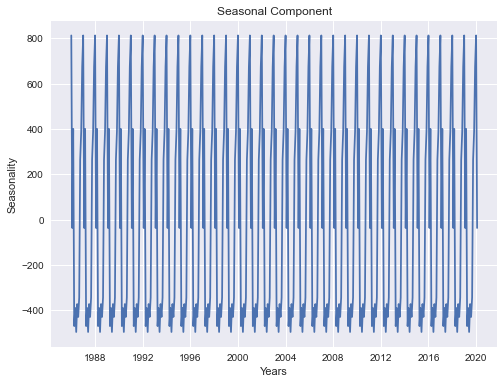

In [10]:
# Display each component separately --> seasonal component 
plt.figure(figsize=(8,6))
plt.plot(result_energy.seasonal)
plt.title("Seasonal Component")
plt.xlabel("Years")
plt.ylabel("Seasonality")
plt.show()

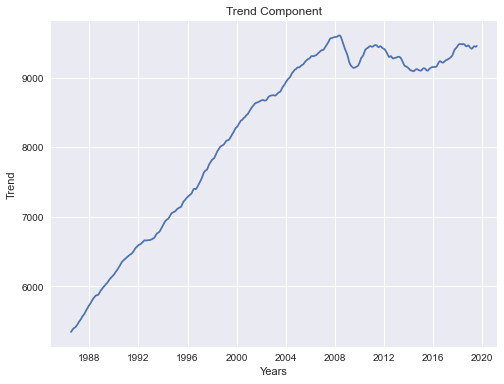

In [11]:
# Display each component separately --> trend component
plt.figure(figsize=(8,6))
plt.plot(result_energy.trend)
plt.title("Trend Component")
plt.xlabel("Years")
plt.ylabel("Trend")
plt.show()

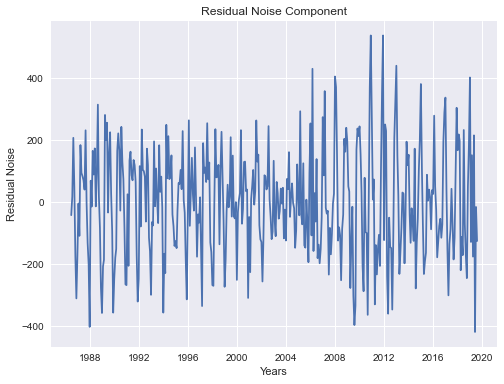

In [12]:
# Display each component separately --> trend component
plt.figure(figsize=(8,6))
plt.plot(result_energy.resid)
plt.title("Residual Noise Component")
plt.xlabel("Years")
plt.ylabel("Residual Noise")
plt.show()

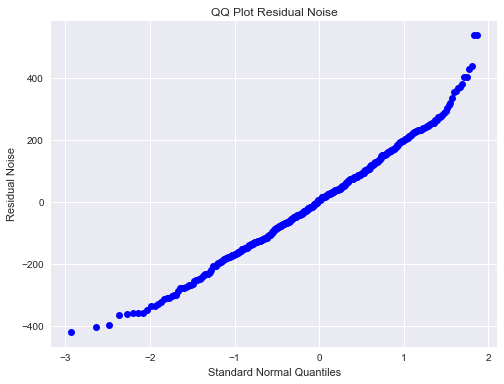

In [13]:
# Display QQ Plot of the residual noise
plt.figure(figsize=(8,6))
stats.probplot(result_energy.resid, dist='norm', plot=plt)
plt.title('QQ Plot Residual Noise')
plt.xlabel("Standard Normal Quantiles")
plt.ylabel("Residual Noise")
plt.show()

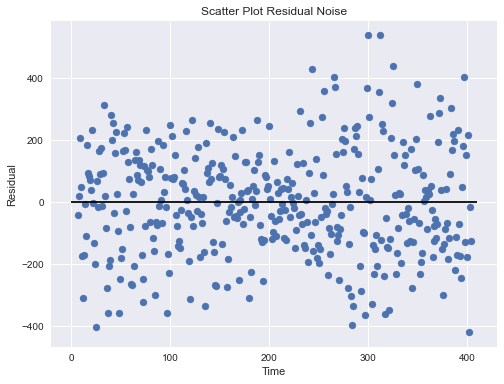

In [14]:
# Display scatter plot of the residual noise 
plt.figure(figsize=(8,6))
plt.scatter(range(1,len(result_energy.resid)+1), result_energy.resid)
plt.hlines(y=0, xmin=0, xmax=len(result_energy.resid))
plt.title("Scatter Plot Residual Noise")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

---
*From your interpretation of the residual plots, are there cyclic, trend or seasonal effects which are unaccounted for?*

The residual noise seems pretty even/random distributed. You can see a slight trend, but this is the same trend as accounted for in the trend component. I don't see any seasonal effects in the noise. You can see a slight cyclic component which isn't accounted for. 

---

### 6. (10 points) Split the time series into training and test sets. Fit an autoregression model on the training set. List the optimal lag found by the AR model. Evaluate your model with the test data by computing the RSME and MAD matrices. 

In [15]:
# Split the time series into train and test sets 
X = np.log(energy.values)
train, test = X[1:len(X)-30], X[len(X)-30:]

# Create the model AR() and then calling fit() to train it. Assign the output of the trained model to a variable model_fit. 
model = AR(train)
model_fit = model.fit()
print('Optimal Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Optimal Lag: 17
Coefficients: [ 0.2369621   0.32245097  0.21171361  0.00468988  0.04671255  0.10497695
  0.01548522 -0.03028579 -0.02644313  0.04539776  0.05736329 -0.02068513
  0.82587434 -0.25256547 -0.09361575 -0.05107395 -0.11843306 -0.06734912]


---
The optimal lag found is 17 

---

RMSE: 0.023
MAD:  0.019


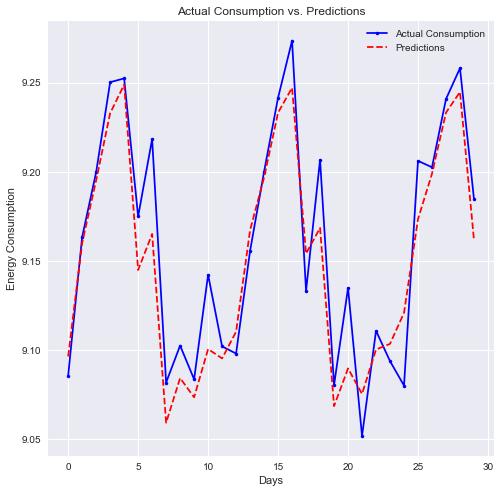

In [16]:
# Evaluate you model with the test data by computing the RSME and MAD matrices. 
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    rmse = sqrt(mean_squared_error(test, predictions))
    mad = mean_absolute_error(test, predictions)
print('RMSE: %.3f' % rmse)
print('MAD:  %.3f' % mad)
# plot results
plt.figure(figsize=(8,8))
plt.plot(test, '.-', color='blue')
plt.plot(predictions, '--', color='red')
plt.title("Actual Consumption vs. Predictions")
plt.xlabel("Days")
plt.ylabel("Energy Consumption")
plt.legend(("Actual Consumption", "Predictions"))
plt.show()

### 7. (15 points) Fit an ARIMA model on the training set. Implement grid search with cross validation to find the optimal p, d, and q values for ARIMA.

In [17]:
X = np.log(energy.values)

np.random.seed(32)
for counter in range(1,6): 
    print("Random Train-Test Split:", counter)
    train, test = train_test_split(X, test_size=0.10)
    p_values = [2, 5, 10, 17]
    d_values = [0, 1, 2]
    q_values = [0, 1, 2]
    best_score, best_cfg = float("inf"), None    

    for p in p_values:        
        for d in d_values:           
            for q in q_values:       
                arima_order=(p,d,q)
                try:          
                    model = ARIMA(train, order=arima_order)
                    model_fit = model.fit(disp=0)
                    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
                    rmse = sqrt(mean_squared_error(test, predictions))                    
                    if rmse < best_score:                        
                        best_score, best_cfg = rmse, arima_order                 
                        print('ARIMA%s RMSE=%.3f' % (arima_order,rmse))   
                except:                   
                    continue    
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))  
    print()

Random Train-Test Split: 1
ARIMA(2, 0, 0) RMSE=0.195
ARIMA(17, 0, 2) RMSE=0.193
Best ARIMA(17, 0, 2) RMSE=0.193

Random Train-Test Split: 2
ARIMA(2, 0, 0) RMSE=0.152
ARIMA(5, 0, 0) RMSE=0.151
ARIMA(5, 0, 1) RMSE=0.151
ARIMA(10, 0, 0) RMSE=0.149
Best ARIMA(10, 0, 0) RMSE=0.149

Random Train-Test Split: 3
ARIMA(2, 0, 0) RMSE=0.172
ARIMA(2, 0, 1) RMSE=0.172
ARIMA(10, 0, 2) RMSE=0.171
ARIMA(17, 0, 0) RMSE=0.168
Best ARIMA(17, 0, 0) RMSE=0.168

Random Train-Test Split: 4
ARIMA(2, 0, 0) RMSE=0.202
ARIMA(2, 0, 1) RMSE=0.201
ARIMA(2, 0, 2) RMSE=0.201
Best ARIMA(2, 0, 2) RMSE=0.201

Random Train-Test Split: 5
ARIMA(2, 0, 0) RMSE=0.180
ARIMA(10, 0, 2) RMSE=0.179
Best ARIMA(10, 0, 2) RMSE=0.179



---
*Find the optimal p, d and q values for ARIMA*

The optimal p = 10, d = 0 and q = 0 for ARIMA. With a RMSE of 0.149. 


---

# 2 Spatial Analysis of Coronavirus Cases in the Netherlands

Thalia Rademakers

Snr. 1243912

Anr. 119079

*This section is worth a total of 50 points. You will be provided with a dataset (XXXXXXX_spatial.csv). This file contains the number of coronavirus cases at each township in the Netherlands and the latitude and longitude. This data was obtained from RIVM. The latitude and longitude values were computed from the centre of each township polygon.*

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 
import scipy.stats as stats
import libpysal as ps 
import esda as es
import scipy as sp
from scipy.spatial.distance import pdist, squareform
import variogram_model as model
import kriging as kriging
import warnings
from scipy.spatial.distance import cdist
from matplotlib import style

In [19]:
# The following functions are used for 2.5
import numpy as np
# Code source: Clayton V. Deutsch
# Modified by Sharon Ong 

def opt( fct, x, y, c, parameterRange=None, meshSize=1000 ):
    '''
    Optimize parameters for a model of the semivariogram
    '''
    if parameterRange == None:
        parameterRange = [ x[1], x[-1] ]
    mse = np.zeros( meshSize )
    a = np.linspace( parameterRange[0], parameterRange[1], meshSize )
    for i in range( meshSize ):
        mse[i] = np.mean( ( y - fct( x, a[i], c ) )**2.0 )
    return a[ mse.argmin() ]
    
def typetest( h, a, lta, gta ):
    '''
    Input:  (h)   scalar or NumPy ndarray
            (a)   scalar representing the range parameter
            (lta) function to perfrom for values less than (a)
            (gta) function to perform for values greater than (a)
    Output:       scalar or array, depending on (h)
    '''
    # if (h) is a numpy ndarray, then..
    try:
        # apply lta() to elements less than a
        lt = lta( h[ np.where( h <= a ) ] )
        # apply gta() to elements greater than a
        gt = gta( h[ np.where( h > a ) ] )
        return np.hstack((lt,gt))
    # otherwise, if (h) is a scalar..
    except TypeError:
        if h <= a:
            return lta( h )
        else:
            return gta( h )
        
def nugget( h, a, c ):
    '''
    Nugget model of the semivariogram
    '''
    c = float(c)
    lta = lambda x: 0+x*0
    gta = lambda x: c+x*0
    return typetest( h, 0, lta, gta )

def linear( h, a, c ):
    '''
    Linear model of the semivariogram
    '''
    a, c = float(a), float(c)
    lta = lambda x: (c/a)*x
    gta = lambda x: c+x*0
    return typetest( h, a, lta, gta )

def spherical( h, a, c ):
    '''
    Spherical model of the semivariogram
    '''
    a, c = float(a), float(c)
    lta = lambda x: c*( 1.5*(x/a) - 0.5*(x/a)**3.0 )
    gta = lambda x: c+x*0
    return typetest( h, a, lta, gta )

def exponential( h, a, c ):
    '''
    Exponential model of the semivariogram
    '''
    a, c = float( a ), float( c )
    return c*( 1.0 - np.exp( -3.0*h/a ) )

def gaussian( h, a, c ):
    '''
    Gaussian model of the semivariogram
    '''
    a, c = float( a ), float( c )
    return c*( 1.0 - np.exp( -3.0*h**2.0/a**2.0 ) )

def semivariance( fct, param ): 
    '''
    Input:  (fct)   function that takes data and parameters
            (param) list or tuple of parameters
    Output: (inner) function that only takes data as input
                    parameters are set internally
    '''
    def inner( h ):
        return fct(h,*param)
    return inner

In [20]:
# The following functions are used in 2.6
def covariance( fct, param ): 
    '''
    Input:  (fct)   function that takes data and parameters
            (param) list or tuple of parameters
    Output: (inner) function that only takes data as input
                    parameters are set internally
    '''
    def inner( h ):
        return param[-1] - fct(h,*param)
    return inner

def kmatrices( data, covfct, u, N=0 ):
    '''
    Input  (data)  ndarray, data
           (model) modeling function
                    - spherical
                    - exponential
                    - gaussian
           (u)     unsampled point
           (N)     number of neighboring points
                   to consider, if zero use all
    '''
    # u needs to be two dimensional for cdist()
    if np.ndim( u ) == 1:
        u = [u]
    # distance between u and each data point in P
    d = cdist( data[:,:2], u )
    # add these distances to P
    P = np.hstack(( data, d ))
    # if N>0, take the N closest points,
    if N > 0:
        P = P[d[:,0].argsort()[:N]]
    # otherwise, use all of the points
    else:
        N = len( P )

    # apply the covariance model to the distances
    k = covfct( P[:,3] )
    # check for nan values in k
    if np.any( np.isnan( k ) ):
        raise ValueError('The vector of covariances, k, contains NaN values')
    # cast as a matrix
    k = np.matrix( k ).T

    # form a matrix of distances between existing data points
    K = squareform(pdist(P[:,:2]))
    # apply the covariance model to these distances
    K = covfct( K.ravel() )
    # check for nan values in K
    if np.any( np.isnan( K ) ):
        raise ValueError('The matrix of covariances, K, contains NaN values')
    # re-cast as a NumPy array -- thanks M.L.
    K = np.array( K )
    # reshape into an array
    K = K.reshape(N,N)
    # cast as a matrix
    K = np.matrix( K )

    return K, k, P

def ordinary( data, covfct, u, N=0, nugget=0 ):

    # calculate the matrices K, and k
    Ks, ks, P = kmatrices( data, covfct, u, N )

    # if N is not set, determine from Ks
    if N == 0:
        N, N = Ks.shape

    # add a column and row of ones to Ks,
    # with a zero in the bottom, right hand corner
    K = np.matrix( np.ones(( N+1, N+1 )) )
    K[:N,:N] = Ks
    K[-1,-1] = 0.0

    # add a one to the end of ks
    k = np.matrix( np.ones(( N+1,1 )) )
    k[:N] = ks
    
    # calculate the kriging weights
    weights = np.linalg.inv( K ) * k
    weights = np.array( weights )

    # calculate k' * K * k for
    # the kriging variance
    kvar = k.T * weights

    # mean of the variable
    mu = np.mean( data[:,2] )
    
    # calculate the residuals
    residuals = P[:,2]

    # calculate the estimation
    estimation = np.dot( weights[:-1].T, residuals )

    # calculate the sill and the kriging standard deviation
    sill = np.var( data[:,2] )
    kvar = float( sill + nugget - kvar )
    kstd = np.sqrt( kvar )

    return float( estimation ), kstd

def krige(data, covfct, grid, method='simple', N=0, nugget=0):
    '''
    Krige an <Nx2> array of points representing a grid.
    
    Use either simple or ordinary kriging, some number N
    of neighboring points, and a nugget value.
    '''
    kriging_method = None
    if method == 'simple':
        kriging_method = simple 
    elif method == 'ordinary':
        kriging_method = ordinary
    M = len(grid)
    
    est = np.zeros((M, 1))
    kstd = np.zeros((M, 1))
    for i in range(M):
        est[i], kstd[i] = kriging_method(data, covfct, grid[i], N, nugget)
    return est, kstd

In [21]:
warnings.filterwarnings("ignore")

### 1. (5 points) Load the dataset. Display the latitude and longitude in a dot density map with a colormap corresponding to the number of coronavirus cases (the data in the column "Totaal_Absoluut"). 

In [22]:
# Import csv file
covid = pd.read_csv('1243912_spatial.csv')
display(covid.head())

,Unnamed: 0,Gemeente,Gemnr,Gemeente.1,Bev_2020,van_datum,tot_datum,Totaal_Absoluut,Totaal_inc100000,Zkh_Absoluut,Zkh_inc100000,Overleden_Absoluut,Overleden_inc100000,latitude,longitude
0,4,Almere,34,Almere,211893.0,28/10/2020,10/11/2020,1258.0,593.7,4.0,1.9,5.0,2.4,52.371353,5.222124
1,7,Zeewolde,50,Zeewolde,22653.0,28/10/2020,10/11/2020,64.0,282.5,0.0,0.0,0.0,0.0,52.331100,5.540500
2,48,Barneveld,203,Barneveld,59082.0,28/10/2020,10/11/2020,420.0,710.9,4.0,6.8,3.0,5.1,52.140000,5.584000
3,49,Beuningen,209,Beuningen,25890.0,28/10/2020,10/11/2020,153.0,591.0,2.0,7.7,2.0,7.7,51.859700,5.769000
4,51,Buren,214,Buren,26749.0,28/10/2020,10/11/2020,139.0,519.6,0.0,0.0,1.0,3.7,51.966600,5.416600


In [23]:
# Convert it to geodataframe 
covid_gdf = gpd.GeoDataFrame(covid, geometry=gpd.points_from_xy(covid.longitude, covid.latitude))
display(covid_gdf.head())

,Unnamed: 0,Gemeente,Gemnr,Gemeente.1,Bev_2020,van_datum,tot_datum,Totaal_Absoluut,Totaal_inc100000,Zkh_Absoluut,Zkh_inc100000,Overleden_Absoluut,Overleden_inc100000,latitude,longitude,geometry
0,4,Almere,34,Almere,211893.0,28/10/2020,10/11/2020,1258.0,593.7,4.0,1.9,5.0,2.4,52.371353,5.222124,POINT (5.22212 52.37135)
1,7,Zeewolde,50,Zeewolde,22653.0,28/10/2020,10/11/2020,64.0,282.5,0.0,0.0,0.0,0.0,52.331100,5.540500,POINT (5.54050 52.33110)
2,48,Barneveld,203,Barneveld,59082.0,28/10/2020,10/11/2020,420.0,710.9,4.0,6.8,3.0,5.1,52.140000,5.584000,POINT (5.58400 52.14000)
3,49,Beuningen,209,Beuningen,25890.0,28/10/2020,10/11/2020,153.0,591.0,2.0,7.7,2.0,7.7,51.859700,5.769000,POINT (5.76900 51.85970)
4,51,Buren,214,Buren,26749.0,28/10/2020,10/11/2020,139.0,519.6,0.0,0.0,1.0,3.7,51.966600,5.416600,POINT (5.41660 51.96660)


In [24]:
# Check if there are missing values in the dataset
print(covid.isnull().sum())

Unnamed: 0             0
Gemeente               0
Gemnr                  0
Gemeente.1             0
Bev_2020               0
van_datum              0
tot_datum              0
Totaal_Absoluut        0
Totaal_inc100000       0
Zkh_Absoluut           0
Zkh_inc100000          0
Overleden_Absoluut     0
Overleden_inc100000    0
latitude               0
longitude              0
geometry               0
dtype: int64


In [25]:
# Use Seaborn style for all the coming plots 
style.use('seaborn')

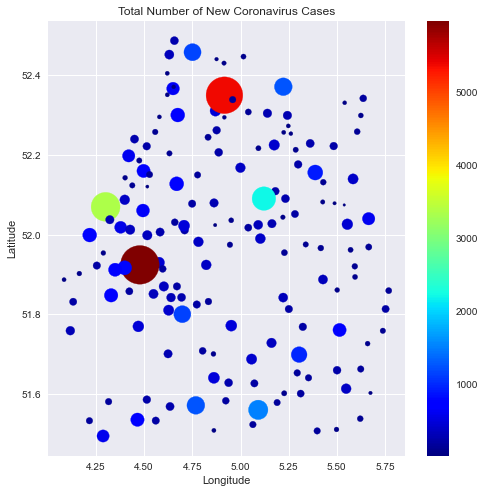

In [26]:
# Display the latitude and longitude in a dot density plot 
plt.figure(figsize=[8,8])
plt.scatter(covid['longitude'], covid['latitude'], c=covid['Totaal_Absoluut'], s=covid['Totaal_Absoluut']/4, cmap='jet')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Total Number of New Coronavirus Cases")
plt.show()

**First verify that the Totaal_Absoluut data is normally distributed**

In [27]:
# First check the basic numbers for Totaal_Absoluut
covid['Totaal_Absoluut'].describe()

count     160.000000
mean      401.525000
std       711.430439
min        26.000000
25%       125.750000
50%       225.500000
75%       386.250000
max      5973.000000
Name: Totaal_Absoluut, dtype: float64

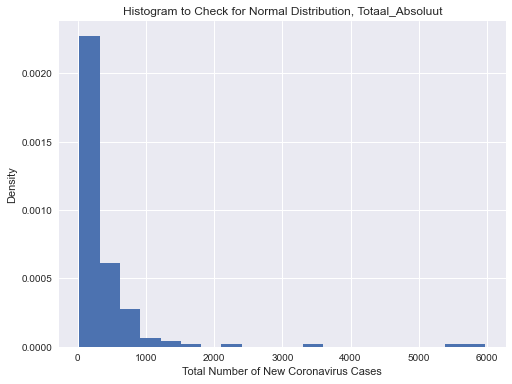

In [28]:
# Check for normal distribution with a histogram for Totaal_Absoluut
plt.figure(figsize=(8,6))
plt.hist(covid['Totaal_Absoluut'], bins=20, density=True)
plt.xlabel("Total Number of New Coronavirus Cases")
plt.ylabel("Density")
plt.title("Histogram to Check for Normal Distribution, Totaal_Absoluut")
plt.show()

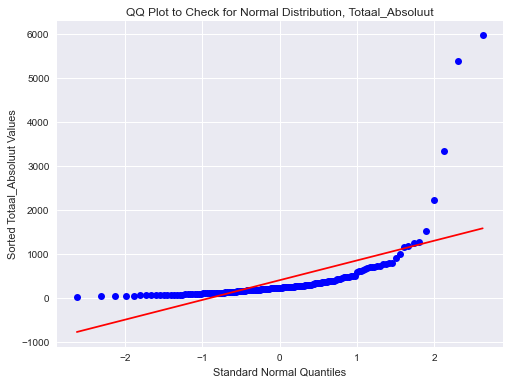

In [29]:
# Another check to see if data is normally distributed with a QQ Plot for Totaal_Absoluut
plt.figure(figsize=(8,6))
stats.probplot(covid['Totaal_Absoluut'], dist='norm', plot=plt)
plt.title("QQ Plot to Check for Normal Distribution, Totaal_Absoluut")
plt.xlabel("Standard Normal Quantiles")
plt.ylabel("Sorted Totaal_Absoluut Values")
plt.show()

**Both the histogram and qq plot show that the Totaal_Absoluut data does not have a normal distribution. The data needs to be normalized before further computations.**

In [30]:
# Transform Totaal_Absoluut to a Normal Distribution 
covid['Totaal_Absoluut_trans'], lmbda = stats.boxcox(covid['Totaal_Absoluut'])

In [31]:
# First check the basic numbers for Totaal_Absoluut_trans
covid['Totaal_Absoluut_trans'].describe()

count    160.000000
mean       3.331490
std        0.304419
min        2.409264
25%        3.126261
50%        3.340682
75%        3.517650
max        4.178792
Name: Totaal_Absoluut_trans, dtype: float64

Text(0.5, 1.0, 'Histogram to Check for Normal Distribution, transformed Totaal_Absoluut')

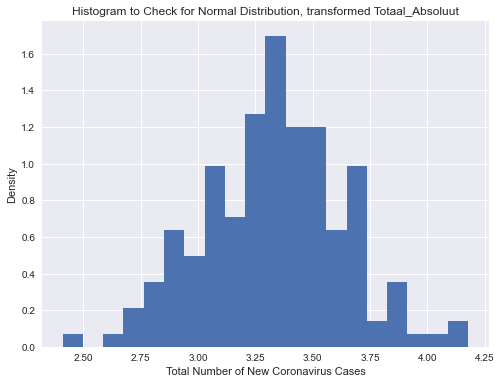

In [32]:
# Check for normal distribution with a histogram for Totaal_Absoluut_trans
plt.figure(figsize=(8,6))
plt.hist(covid['Totaal_Absoluut_trans'], bins=20, density=True)
plt.xlabel("Total Number of New Coronavirus Cases")
plt.ylabel("Density")
plt.title("Histogram to Check for Normal Distribution, transformed Totaal_Absoluut")

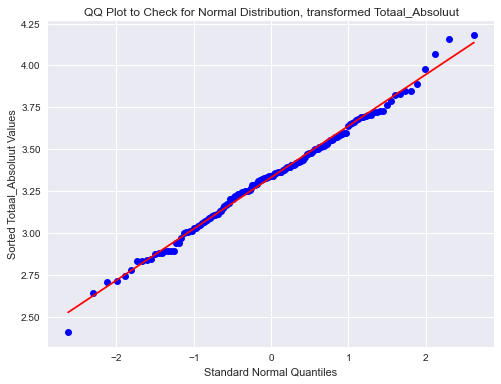

In [33]:
# Another check to see if data is normally distributed with a QQ Plot for Totaal_Absoluut_trans
plt.figure(figsize=(8,6))
stats.probplot(covid['Totaal_Absoluut_trans'], dist='norm', plot=plt)
plt.title("QQ Plot to Check for Normal Distribution, transformed Totaal_Absoluut")
plt.xlabel("Standard Normal Quantiles")
plt.ylabel("Sorted Totaal_Absoluut Values")
plt.show()

**Totaal_Absoluut does now follow a normal distribution.**

**Verify that the Totaal_inc100000 data is normally distributed**

In [34]:
# First check the basic numbers for Totaal_inc100000
covid['Totaal_inc100000'].describe()

count     160.000000
mean      642.596250
std       176.714317
min       260.700000
25%       524.450000
50%       619.850000
75%       727.825000
max      1239.400000
Name: Totaal_inc100000, dtype: float64

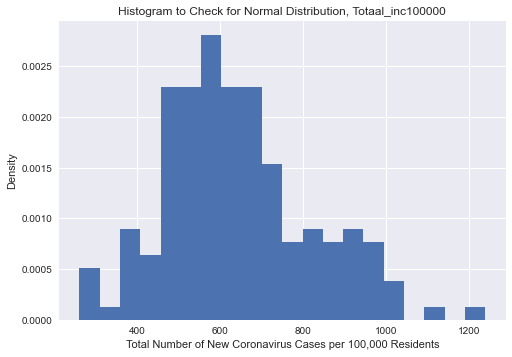

In [35]:
# Check to see if Totaal_inc100000 is normally distributed 
plt.figure()
plt.hist(covid['Totaal_inc100000'], bins = 20, density=True)
plt.xlabel("Total Number of New Coronavirus Cases per 100,000 Residents")
plt.ylabel("Density")
plt.title("Histogram to Check for Normal Distribution, Totaal_inc100000")
plt.show()

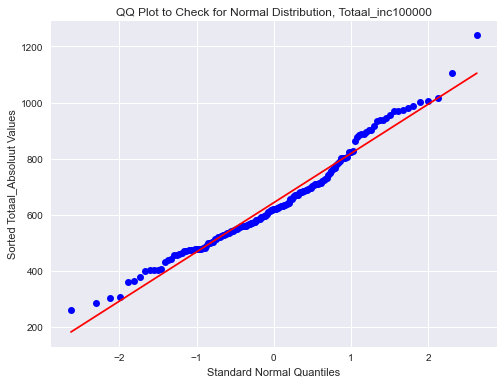

In [36]:
# Another check to see if Totaal_inc100000 data is normally distributed
plt.figure(figsize=(8,6))
stats.probplot(covid['Totaal_inc100000'], dist='norm', plot=plt)
plt.title("QQ Plot to Check for Normal Distribution, Totaal_inc100000")
plt.xlabel("Standard Normal Quantiles")
plt.ylabel("Sorted Totaal_Absoluut Values")
plt.show()

**Both the histogram and QQ Plot show that Totaal_inc100000 seem to have a pretty normal distribution. I won't transform this variable.**

### 2. (10 points) Using two different distance based weighting schemes. Compute and compare the global autocorrelation of the number of new cases ("Totaal_Absoluut") and the total number new cases per 100,000 residents ("Totaal_inc100000"). Which feature "Totaal_inc100000" or "Totaal_Absoluut" is more autocorrelated? 

**2a. KNN weighing scheme. Compute the Global Moran's for (the normalized dataset of) Totaal_Absoluut.**

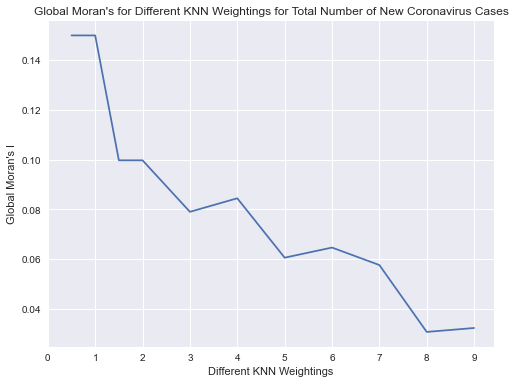

In [37]:
# Compute the Global Moran's I Statistic for Totaal_Absoluut_trans for different k values. Which value is the best? 
global_is = []
ks = [0.5,1,1.5,2,3,4,5,6,7,8,9]
for val in ks: 
    knnW = ps.weights.KNN.from_dataframe(covid_gdf, k=val)
    Wmatrix, ids = knnW.full()
    knnW.transform = 'r'
    I_covid_totaal_absoluut = es.moran.Moran(covid_gdf['Totaal_Absoluut_trans'].values - np.amin(covid_gdf['Totaal_Absoluut_trans'].values), knnW)
    global_is.append(I_covid_totaal_absoluut.I)

plt.figure(figsize=(8,6))
plt.plot(ks,global_is)
plt.title("Global Moran's for Different KNN Weightings for Total Number of New Coronavirus Cases")
plt.xlabel('Different KNN Weightings')
plt.ylabel('Global Moran\'s I')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [38]:
# k = 1 gives the best Global Moran's I for Totaal_Absoluut_trans. Use this to compute the exact score. 
knn1 = ps.weights.KNN.from_dataframe(covid_gdf, k=1)
I_covid_totaal_absoluut_knn1 = es.moran.Moran(covid_gdf['Totaal_Absoluut_trans'].values, knn1)
print("Global Moran Using KNN Weighting for Total Number of New Coronavirus Cases:")
print()
print("Global Autocorrelation of Totaal_Absoluut: \t", I_covid_totaal_absoluut_knn1.I, "\n",
      "p-value of Totaal_Absoluut: \t \t \t", I_covid_totaal_absoluut_knn1.p_sim)

Global Moran Using KNN Weighting for Total Number of New Coronavirus Cases:

Global Autocorrelation of Totaal_Absoluut: 	 0.14997876844488844 
 p-value of Totaal_Absoluut: 	 	 	 0.051


**2b. KNN weighing scheme. Compute the Global Moran's for (the normalized dataset of) Totaal_inc100000.**

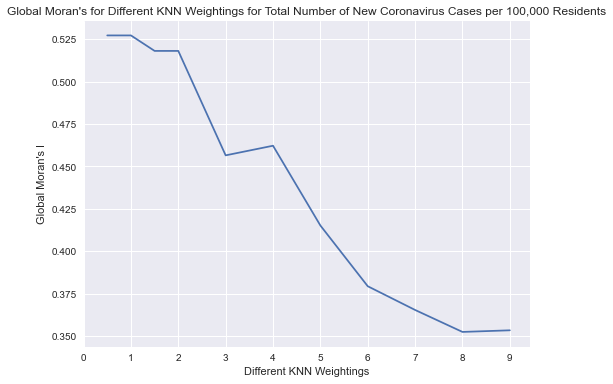

In [39]:
# Compute the Global Moran's I Statistic for Totaal_inc100000 for different k values. Which value is the best? 
global_is = []
ks = [0.5,1,1.5,2,3,4,5,6,7,8,9]
for val in ks: 
    knnW = ps.weights.KNN.from_dataframe(covid_gdf, k=val)
    Wmatrix, ids = knnW.full()
    knnW.transform = 'r'
    I_covid_totaal_inc100000 = es.moran.Moran(covid_gdf['Totaal_inc100000'].values - np.amin(covid_gdf['Totaal_inc100000'].values), knnW)
    global_is.append(I_covid_totaal_inc100000.I)

plt.figure(figsize=(8,6))
plt.plot(ks,global_is)
plt.title("Global Moran's for Different KNN Weightings for Total Number of New Coronavirus Cases per 100,000 Residents")
plt.xlabel('Different KNN Weightings')
plt.ylabel('Global Moran\'s I')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [40]:
# k = 1 gives the best Global Moran's I for Totaal_inc100000. Use this to compute the exact score. 
knn1 = ps.weights.KNN.from_dataframe(covid_gdf, k=1)
I_covid_totaal_inc100000_knn1 = es.moran.Moran(covid_gdf['Totaal_inc100000'].values, knn1)
print("Global Moran Using KNN Weighting for Total Number of New Coronavirus Cases per 100,000 Residents:")
print()
print("Global Autocorrelation of Totaal_inc100000: \t", I_covid_totaal_inc100000_knn1.I, "\n", 
      "p-value of Totaal_Absoluut: \t \t \t", I_covid_totaal_inc100000_knn1.p_sim)

Global Moran Using KNN Weighting for Total Number of New Coronavirus Cases per 100,000 Residents:

Global Autocorrelation of Totaal_inc100000: 	 0.5272044464427191 
 p-value of Totaal_Absoluut: 	 	 	 0.001


**2c. Distance Based weighing scheme. Compute the Global Moran's for (the normalized dataset of) Totaal_Absoluut.**

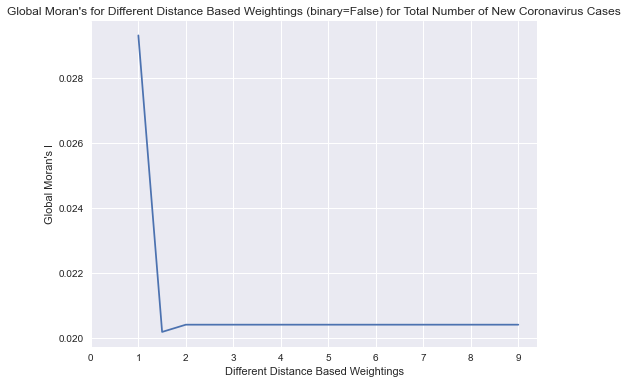

In [41]:
# Compute the Global Moran's I Statistic for Totaal_Absoluut_trans for different k values. Which value is the best? 
globalA = []

k = [1,1.5,2,3,4,5,6,7,8,9]
for val in k: 
    w_distA = ps.weights.DistanceBand.from_dataframe(covid_gdf, val, binary = False, silence_warnings=True)
    I_covidA = es.moran.Moran(covid_gdf['Totaal_Absoluut_trans'].values, w_distA)
    globalA.append(I_covidA.I)

plt.figure(figsize=(8,6))
plt.plot(k,globalA)
plt.title("Global Moran's for Different Distance Based Weightings (binary=False) for Total Number of New Coronavirus Cases")
plt.xlabel('Different Distance Based Weightings')
plt.ylabel('Global Moran\'s I')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [42]:
# k = 1 gives the best Global Moran's I for Totaal_Absoluut_trans. Use this to compute the exact score.
w_dist0p1 = ps.weights.DistanceBand.from_dataframe(covid_gdf, 1, binary = False, silence_warnings=True)
I_province_elevation = es.moran.Moran(covid_gdf['Totaal_Absoluut_trans'].values, w_dist0p1)
print("Global Moran Using Distance Based Weighting for Total Number of New Coronavirus Cases:")
print()
print("Global Autocorrelation of Totaal_Absoluut: \t", I_province_elevation.I, "\n", 
      "p-value of Totaal_Absoluut: \t \t \t", I_province_elevation.p_sim)

Global Moran Using Distance Based Weighting for Total Number of New Coronavirus Cases:

Global Autocorrelation of Totaal_Absoluut: 	 0.029306472227152214 
 p-value of Totaal_Absoluut: 	 	 	 0.008


**2d. Distance Based weighing scheme. Compute the Global Moran's for (the normalized dataset of) Totaal_inc100000.**

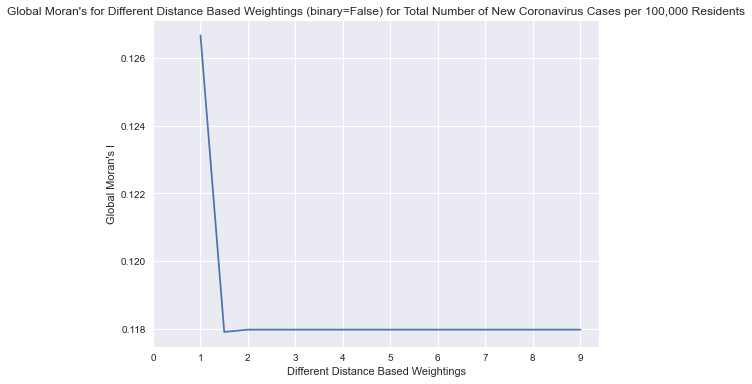

In [43]:
# Compute the Global Moran's I Statistic for Totaal_inc100000 for different k values. Which value is the best? 
globalB = []

k = [1,1.5,2,3,4,5,6,7,8,9]
for val in k: 
    w_distB = ps.weights.DistanceBand.from_dataframe(covid_gdf, val, binary = False, silence_warnings=True)
    I_covidB = es.moran.Moran(covid_gdf['Totaal_inc100000'].values, w_distB)
    globalB.append(I_covidB.I)

plt.figure(figsize=(8,6))
plt.plot(k,globalB)
plt.title("Global Moran's for Different Distance Based Weightings (binary=False) for Total Number of New Coronavirus Cases per 100,000 Residents")
plt.xlabel('Different Distance Based Weightings')
plt.ylabel('Global Moran\'s I')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [44]:
# k = 1 gives the best Global Moran's I for Totaal_inc100000. Use this to compute the exact score.
w_dist0p1 = ps.weights.DistanceBand.from_dataframe(covid_gdf, 1, binary = False, silence_warnings=True)
I_province_elevation = es.moran.Moran(covid_gdf['Totaal_inc100000'].values, w_dist0p1)
print("Global Moran Using Distance Based Weighting for Total Number of New Coronavirus Cases per 100,000 Residents:")
print()
print("Global Autocorrelation of Totaal_inc100000: \t", I_province_elevation.I, "\n", 
       "p-value of Totaal_Absoluut: \t \t \t", I_province_elevation.p_sim)

Global Moran Using Distance Based Weighting for Total Number of New Coronavirus Cases per 100,000 Residents:

Global Autocorrelation of Totaal_inc100000: 	 0.12666110587241422 
 p-value of Totaal_Absoluut: 	 	 	 0.001


---
*Which feature, "Totaal_Absoluut" or "Totaal_inc100000" is more autocorrelated?*

Totaal_inc100000 is more autocorrelated.

---

### 3. (15 points) Using the KNN weighing scheme, compute the local autocorrelation for the same two features as above. Identify the 'hotspots' by displaying the hotspots as these townships with different colors in a scatter plot. 

**3a. Compute the local autocorrelation for Totaal_Absoluut and plot the hotspots**

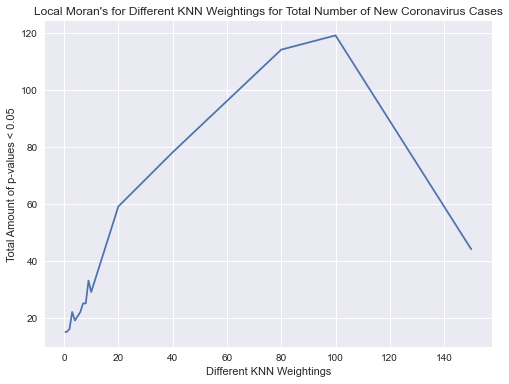

In [45]:
# Compute the local autocorrelation for Totaal_Absoluut
local_is = []
ks = [0.5, 1, 2, 3, 4, 6, 7, 8, 9, 10, 20, 40, 80, 100, 150]
for val in ks:
    knnW = ps.weights.KNN.from_dataframe(covid_gdf, k=val)
    Wmatrix, ids = knnW.full()
    knnW.transform = 'r'
    I_covid_totaal_absoluut_knn = es.moran.Moran_Local(covid_gdf['Totaal_Absoluut_trans'].values - np.amin(covid_gdf['Totaal_Absoluut_trans'].values), knnW)
    local_is.append((I_covid_totaal_absoluut_knn.p_sim < 0.05).sum())

plt.figure(figsize=(8,6))
plt.plot(ks, local_is)
plt.title("Local Moran's for Different KNN Weightings for Total Number of New Coronavirus Cases")
plt.xlabel('Different KNN Weightings')
plt.ylabel('Total Amount of p-values < 0.05')
plt.show()

In [46]:
# Compute the Local Moran's I for Totaal_Absoluut_trans
knnW = ps.weights.KNN.from_dataframe(covid_gdf, k=100)
I_covid_totaal_absoluut_knn = es.moran.Moran_Local(covid_gdf['Totaal_Absoluut_trans'].values, knnW)
print("local Moran’s I values for Totaal_Absoluut: \n", I_covid_totaal_absoluut_knn.Is)
print()
print("local Moran's I quadrant locations for Totaal_Absoluut, 1 = hotspot: \n", I_covid_totaal_absoluut_knn.q)
print()
print("local Moran's I p-values for Totaal_Absoluut: \n", I_covid_totaal_absoluut_knn.p_sim)
print()
print("local Moran's I number of p-values < 0.05 for Totaal_Absoluut: \n", (I_covid_totaal_absoluut_knn.p_sim < 0.05).sum())


local Moran’s I values for Totaal_Absoluut: 
 [-2.74633050e-01  1.77698338e-01 -8.27571401e-02  5.60846074e-02
  7.91498555e-02  4.90138231e-02  9.48748655e-02 -1.74350155e-01
  1.05507767e-01  1.71581289e-02 -8.85793065e-03 -1.32222129e-02
  5.91733647e-02  2.09869046e-01 -5.73577759e-02  5.44176347e-02
  2.17869483e-03 -3.57933722e-03 -1.79054373e-01  8.31511144e-02
 -5.74941113e-03  1.04325119e-01 -3.10093018e-02  2.10882863e-01
 -1.48670442e-02  5.91249954e-02 -3.84565847e-02 -5.53737361e-02
  2.79436357e-01  1.19927937e-01 -1.25093495e-02 -1.39090794e-01
 -1.26513925e-01  1.64941597e-01  1.04756829e-01  1.56249091e-03
 -1.61235456e-02 -3.85951174e-03  7.60072128e-03  5.98423966e-02
  1.92511995e-02  1.91239786e-02  2.09871672e-01 -1.49673341e-01
  9.80908317e-03  8.72218190e-02  1.22760621e-01 -1.49673341e-01
 -9.55120173e-02 -4.79451123e-02  8.91247954e-04  1.90577700e-01
 -9.27964600e-02 -5.14287743e-02 -4.51034996e-02  4.32632650e-02
  4.18394820e-02 -1.73182521e-01  1.50740807

In [47]:
# Identify the hotspots 
sig = I_covid_totaal_absoluut_knn.p_sim <0.05
hotspot = sig * I_covid_totaal_absoluut_knn.q==1

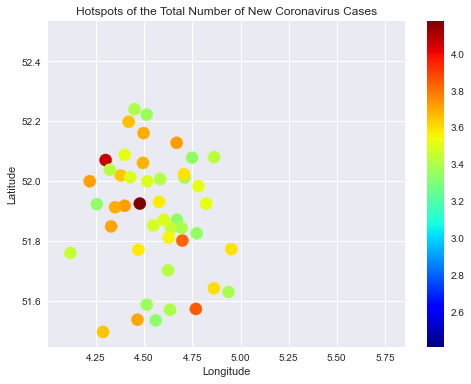

In [48]:
# Display the hotspots of the Local Moran of Totaal_Absoluut in a scatterplot 
plt.figure(figsize=(8,6))
plt.scatter(covid_gdf['longitude'], covid_gdf['latitude'], c=covid_gdf['Totaal_Absoluut_trans'], s=hotspot*150, cmap='jet')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hotspots of the Total Number of New Coronavirus Cases")
plt.show()

**3b. Compute the local autocorrelation for Totaal_inc100000 and plot the hotspots**

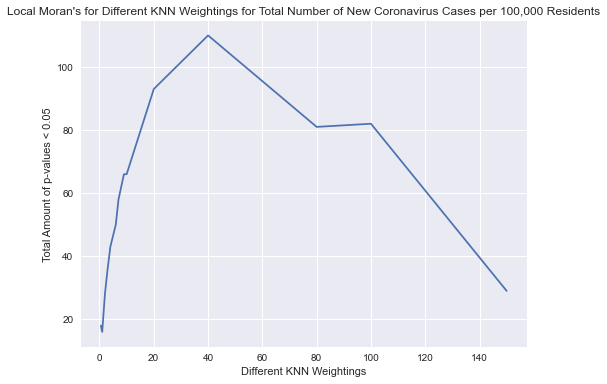

In [49]:
local_is = []
ks = [0.5, 1, 2, 3, 4, 6, 7, 8, 9, 10, 20, 40, 80, 100, 150]
for val in ks:
    knnW = ps.weights.KNN.from_dataframe(covid_gdf, k=val)
    Wmatrix, ids = knnW.full()
    knnW.transform = 'r'
    I_covid_totaal_inc100000_knn = es.moran.Moran_Local(covid_gdf['Totaal_inc100000'].values - np.amin(covid_gdf['Totaal_inc100000'].values), knnW)
    local_is.append((I_covid_totaal_inc100000_knn.p_sim < 0.05).sum())

plt.figure(figsize=(8,6))
plt.plot(ks, local_is)
plt.title("Local Moran's for Different KNN Weightings for Total Number of New Coronavirus Cases per 100,000 Residents")
plt.xlabel('Different KNN Weightings')
plt.ylabel('Total Amount of p-values < 0.05')
plt.show()

In [50]:
# Compute Local Moran's I for Totaal_inc100000
knn = ps.weights.KNN.from_dataframe(covid_gdf, k=40)
I_covid_totaal_inc100000_knn = es.moran.Moran_Local(covid_gdf['Totaal_inc100000'].values, knn)
print("Local Moran’s I values: \n", I_covid_totaal_inc100000_knn.Is)
print()
print("Local Moran's I quadrant locations, 1 = hotspot: \n", I_covid_totaal_inc100000_knn.q)
print()
print("Local Moran's I p-values: \n", I_covid_totaal_inc100000_knn.p_sim)
print()
print("Local Moran's I number of p-values < 0.05: \n", (I_covid_totaal_inc100000_knn.p_sim < 0.05).sum())

Local Moran’s I values: 
 [ 1.07590947e-01  8.47962416e-01 -1.55347645e-01  9.93392151e-02
  1.23718207e-01  3.85113099e-02  8.60911355e-02  2.02149798e-01
  6.96946392e-01  6.40887047e-01 -1.45113448e-01  2.26500434e-01
  1.05535218e-01  3.11320955e-01 -2.39501248e-01  4.22805020e-01
  1.96414182e-01  3.96879189e-02  1.71206996e-01  3.62774791e-01
  1.11919333e-01  7.03723494e-02 -1.67402211e+00 -9.18902589e-02
  2.12168585e-02  4.90662096e-01  3.17159115e-01  3.41543120e-02
  2.59907288e-01  1.78611965e-01  2.06597574e-01  2.95831987e-02
 -1.05574611e-01  9.57529901e-02  1.50504751e-01  4.43024874e-03
  1.77963036e-01 -1.61910430e-02 -2.87600317e-01  2.89606502e-01
  6.95019055e-02  2.26848740e-02  9.00549728e-02  8.69712933e-01
  1.69828751e-01  6.38179379e-01  3.85724175e-01  9.49896292e-01
  2.18564128e-01 -1.52378215e-01 -1.26590371e-01  2.75610766e-02
  1.96410543e-01  4.64772454e-01  1.83039109e-01  3.72303972e-01
 -1.75632946e-01  6.85334591e-01 -2.96733945e-01  1.44102044e+00

In [51]:
# Identify the hotspots 
sig = I_covid_totaal_inc100000_knn.p_sim <0.05
hotspot = sig * I_covid_totaal_inc100000_knn.q==1

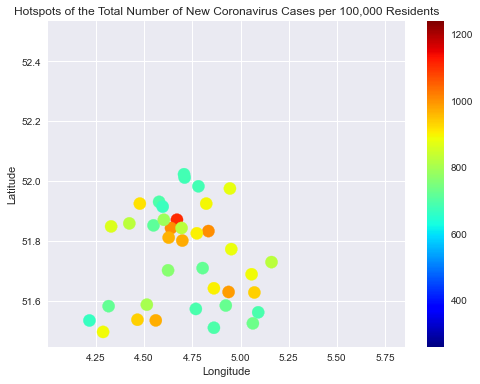

In [52]:
# Display the hotspots of the Local Moran of Totaal_inc100000 in a scatterplot 
plt.figure(figsize=(8,6))
plt.scatter(covid_gdf['longitude'], covid_gdf['latitude'], c=covid_gdf['Totaal_inc100000'], s=hotspot*150, cmap='jet')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hotspots of the Total Number of New Coronavirus Cases per 100,000 Residents")
plt.show()

### 4. (5 points) Create a variogram cloud on the dataset.

**I will create a variogram cloud with the total number of new coronavirus cases per 100,000 residents (Total_inc100000)**

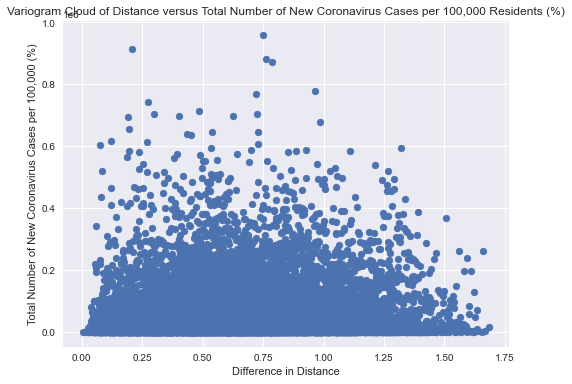

In [53]:
# Create a numpy array with the x and y coordinates and Total_inc100000 covid cases
P = np.array(covid[['latitude', 'longitude', 'Totaal_inc100000']])

# Create a variogram cloud 
distance = []
tot_diff = []
psize = P[:,:2].shape

for i in np.arange(0, psize[0],1):
    for j in np.arange(i+1, psize[0],1):
        diffx = P[i,:][0] - P[j,:][0]
        diffy = P[i,:][1] - P[j,:][1]
        difftot = P[i,:][2] - P[j,:][2]
        distance.append(np.sqrt(diffx*diffx + diffy*diffy))
        tot_diff.append(difftot*difftot)
        
plt.figure(figsize=(8,6))
plt.scatter(distance, tot_diff)
plt.title('Variogram Cloud of Distance versus Total Number of New Coronavirus Cases per 100,000 Residents (%)')
plt.xlabel('Difference in Distance')
plt.ylabel('Total Number of New Coronavirus Cases per 100,000 (%)')
plt.show()

### 5. (10 points) Create the empirical variogram. Fit a variogram model over the data. Which variogram model (if any) best fits the data? 

In [54]:
# The following two functions create lag indices and calculate the mean semivariance for each group of points
def lagindices(pwdist,lag,tol):
    # grab the coordinates in a given range: lag +/- tolerance
    i, j = np.where((pwdist >= lag - tol) & (pwdist < lag + tol))
    # take out the repeated elements,
    # since p is a *symmetric* distance matrix
    indices=np.c_[i, j][np.where(j > i)]
    return indices

def semivariance(data, indices):
    z=(data[indices[:, 0], 2] - data[indices[:, 1], 2])**2.0
    return np.mean(z) / 2.0

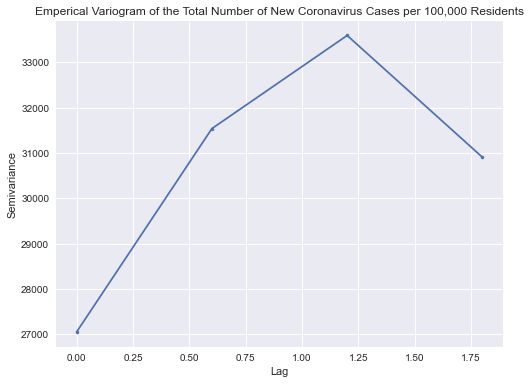

In [55]:
# Create the empirical variogram 
tolerance = 0.3
tol = 0.5
lag = 0.5

lags = np.arange(0, 2.5, tolerance*2)
pwdist = squareform(pdist(P[:,:2]))

# create a list of lists of indices of points having the ~same lag
index = [lagindices(pwdist, lag, tol) for lag in lags]
# remove indexs which are empty
index = list(filter(lambda x: len(covid) > 0, index))

v = [semivariance(P, indices) for indices in index]

plt.figure(figsize=(8,6))
plt.plot(lags, v, '.-')
plt.xlabel("Lag")
plt.ylabel("Semivariance")
plt.title("Emperical Variogram of the Total Number of New Coronavirus Cases per 100,000 Residents")
plt.show()

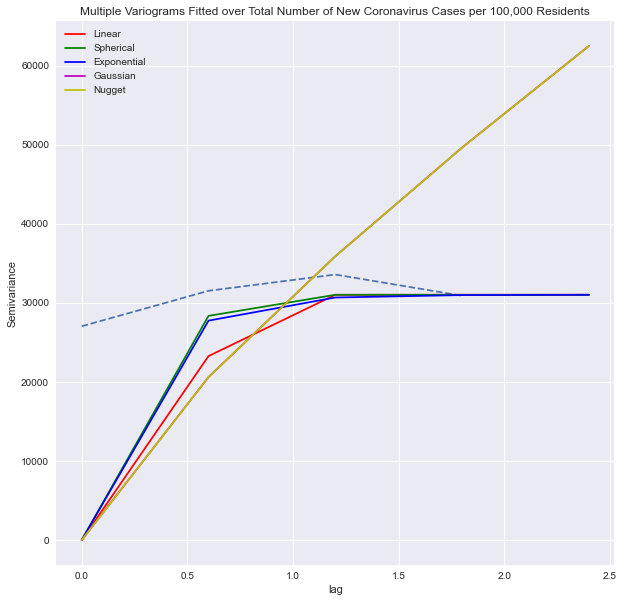

In [56]:
# Fit different variogram models over the data: linear, spherical, exponential, gaussian
sill = np.var(P[:, 2])
variogram_model1 = model.semivariance(model.linear, [0.8, sill])
variogram_model2 = model.semivariance(model.spherical, [0.8, sill])
variogram_model3 = model.semivariance(model.exponential, [0.8, sill])
variogram_model4 = model.semivariance(model.gaussian, [0.8, sill])
variogram_model4 = model.semivariance(model.nugget, [0.8, sill])
variogram_model4 = model.semivariance(model.power, [0.8, sill])

plt.figure(figsize=(10,10))
plt.plot(lags,v,'--')
plt.plot(lags, variogram_model1(lags), 'r',label='Linear')
plt.plot(lags, variogram_model2(lags), 'g',label='Spherical')
plt.plot(lags, variogram_model3(lags), 'b',label='Exponential')
plt.plot(lags, variogram_model4(lags), 'm',label='Gaussian')
plt.plot(lags, variogram_model4(lags), 'y',label='Nugget')
plt.legend() 
plt.xlabel("lag")
plt.ylabel("Semivariance")
plt.title("Multiple Variograms Fitted over Total Number of New Coronavirus Cases per 100,000 Residents")
plt.show()

---
*Which variogram model, if any, best fits the data?*

None of them fit the data well. It seems to me that variograms don't work very well in this case. Lets' see if kriging works better. 

---


### 6. (5 points) Compute the number of coronavirus cases at latitude of 52 degrees and longitude of 5 degrees using kriging. Comment on the suitability of kriging for this application. 

In [57]:
covfct = model.covariance(model.gaussian, (0.8, sill))
[estS, kstdS] = kriging.ordinary(P, covfct, [52, 5], N=3)
print("The Number of New Coronavirus Cases per 100,000 Residents at a latitude of 52 and a longitude of 5 degrees:")
print()
print("Computed Number of Cases:\t", estS, "\n", "Standard deviation: \t \t \t", kstdS)

The Number of New Coronavirus Cases per 100,000 Residents at a latitude of 52 and a longitude of 5 degrees:

Computed Number of Cases:	 725.1914597041535 
 Standard deviation: 	 	 	 3.742823872064309


---
*Comment on the suitability of kriging for this application.*

Kriging can only be used, when a dataset has a normal distribution. For the variable Total_inc100000, which is roughly normally distributed, kriging is very suitable because it gives a good estimation of the number of coronavirus cases. The variable Total_Absolute on the other hand, didn't follow a normal distribution and had to be transformed. Kriging on the transformed variable does work, however, because all the values are transformed, you can't easily see how many actual coronavirus cases are computed. 

---